# TESS GI Cycle 2 proposal 
## McQuillan sample

In [1]:
# %load /Users/obsidian/Desktop/defaults.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('talk')

from astropy.io import ascii
from astropy.io import fits

Let's read in McQuillan et al. Table 1.  We seek to replicate Figure 4.

In [2]:
#! wget https://iopscience.iop.org/0067-0049/211/2/24/suppdata/apjs492452t1_mrt.txt
#! mkdir ../data/McQuillan2014
#! mv apjs492452t1_mrt.txt ../data/McQuillan2014/

In [3]:
tab1 = ascii.read('../data/McQuillan2014/apjs492452t1_mrt.txt')

In [4]:
df1 = tab1.to_pandas()

In [5]:
df1.columns

Index(['KIC', 'Teff', 'log(g)', 'Mass', 'PRot', 'e_PRot', 'Rper', 'LPH', 'w',
       'DC', 'Flag'],
      dtype='object')

### Let's update the effective temperature from Gaia

In [6]:
hdu = fits.open('/Volumes/Truro/gaia_kepler_fun/kepler_dr2_4arcsec.fits')

In [10]:
hdu1 = hdu[1]

In [8]:
keep_cols2 = ['source_id', 'kepid', 'teff_val', 'lum_val', 'phot_g_mean_mag', 'phot_bp_mean_mag', 'phot_rp_mean_mag']

In [11]:
df2 = pd.DataFrame({key:hdu1.data[key] for key in keep_cols2})

In [12]:
hdu.close()

Text(0, 0.5, '$L/L_{\\odot}$')

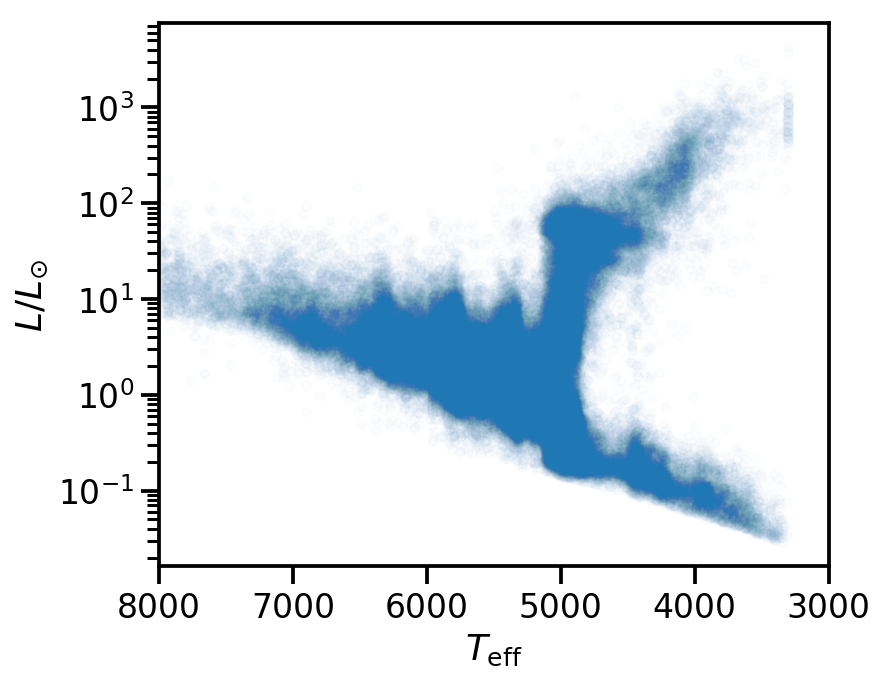

In [13]:
plt.figure(figsize=(6, 5))
plt.plot(df2.teff_val, df2.lum_val, '.', alpha=0.01)
plt.xlim(8000, 3000)
plt.yscale('log')
plt.xlabel('$T_{\mathrm{eff}}$')
plt.ylabel('$L/L_{\odot}$')

Hmm... lots of artificial structure in the Gaia-provided $T_{\mathrm{eff}}$ and Luminosity estimates, which is known: the DPAC-provided values are *illustrative* coarse estimates.  Let's use values from **Berger et al. 2018**.

In [6]:
! wget https://iopscience.iop.org/0004-637X/866/2/99/suppdata/apjaada83t1_mrt.txt
! mkdir ../data/Berger2018
! mv apjaada83t1_mrt.txt ../data/Berger2018/

--2021-01-22 14:12:47--  https://iopscience.iop.org/0004-637X/866/2/99/suppdata/apjaada83t1_mrt.txt
Resolving iopscience.iop.org (iopscience.iop.org)... 141.226.253.39
Connecting to iopscience.iop.org (iopscience.iop.org)|141.226.253.39|:443... connected.
HTTP request sent, awaiting response... 
  HTTP/1.1 200 OK
  Content-Type: text/plain;charset=UTF-8
  Content-Length: 17792793
  Connection: keep-alive
  Set-Cookie: __uzma=a8c719cf-7fd6-42d3-8583-debf2cae2e9d; HttpOnly; path=/; Expires=Fri, 23-Jul-21 20:12:47 GMT ; Max-Age=15724800; SameSite=Lax
  Set-Cookie: __uzmb=1611346367; HttpOnly; path=/; Expires=Fri, 23-Jul-21 20:12:47 GMT ; Max-Age=15724800; SameSite=Lax
  Set-Cookie: __uzmc=892481031485; HttpOnly; path=/; Expires=Fri, 23-Jul-21 20:12:47 GMT ; Max-Age=15724800; SameSite=Lax
  Set-Cookie: __uzmd=1611346367; HttpOnly; path=/; Expires=Fri, 23-Jul-21 20:12:47 GMT ; Max-Age=15724800; SameSite=Lax
  Set-Cookie: __uzme=4351; HttpOnly; path=/; Expires=Fri, 23-Jul-21 20:12:47 GMT ; M

In [7]:
tab3 = ascii.read('../data/Berger2018/apjaada83t1_mrt.txt')

In [8]:
df3 = tab3.to_pandas()

In [9]:
df3.head()

,KIC,Gaia,Teff,e_Teff,D,E_D,e_D,R*,E_R*,e_R*,AV,Evol,Bin
0,757076,2050233807328471424,5164,181,658.465,21.419,20.163,3.986,0.324,0.293,0.273,1,0
1,757099,2050233601176543104,5521,193,369.374,3.708,3.645,1.053,0.078,0.071,0.120,0,0
2,757137,2050230543159814656,4751,166,570.715,8.271,8.060,13.406,1.004,0.916,0.230,2,0
3,757280,2050230611879323904,6543,229,824.791,15.079,14.586,2.687,0.205,0.186,0.323,0,0
4,757450,2050231848829944320,5306,106,835.371,18.423,17.692,0.962,0.047,0.044,0.298,0,0


Text(0, 0.5, '$R/R_{\\odot}$')

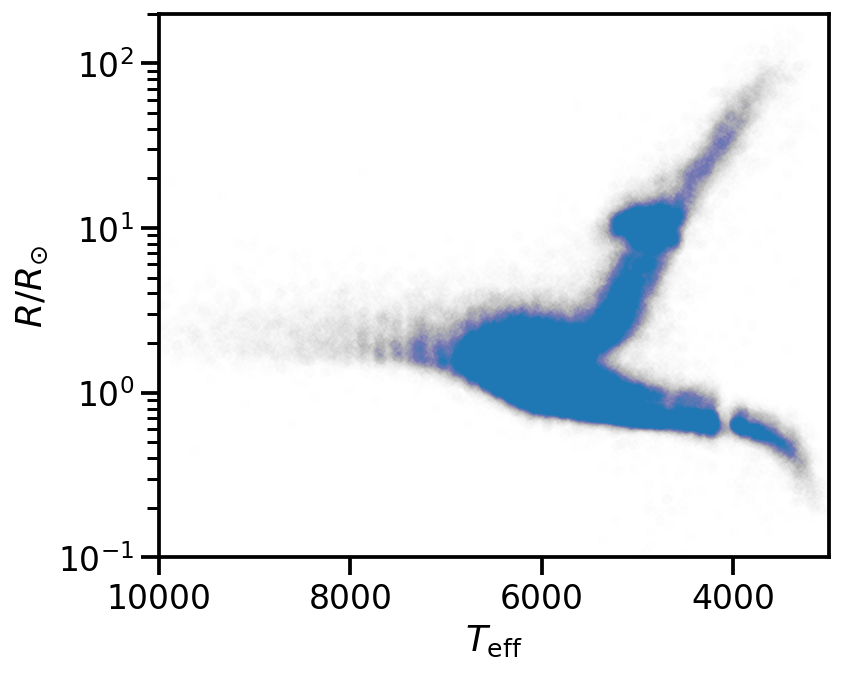

In [10]:
plt.figure(figsize=(6, 5))
plt.plot(df3.Teff, df3['R*'], '.', alpha=0.003)
plt.xlim(10000, 3000)
plt.ylim(1.0e-1, 2.0e2)
plt.yscale('log')
plt.xlabel('$T_{\mathrm{eff}}$')
plt.ylabel('$R/R_{\odot}$')

Resembles Figure 3 of Berger et al. 2018.

In [11]:
df4 = pd.merge(df1, df3, how='outer', on='KIC', indicator=True, suffixes=('_McQuillan14', '_Berger18'))

In [12]:
df4.columns

Index(['KIC', 'Teff_McQuillan14', 'log(g)', 'Mass', 'PRot', 'e_PRot', 'Rper',
       'LPH', 'w', 'DC', 'Flag', 'Gaia', 'Teff_Berger18', 'e_Teff', 'D', 'E_D',
       'e_D', 'R*', 'E_R*', 'e_R*', 'AV', 'Evol', 'Bin', '_merge'],
      dtype='object')

In [13]:
df4.head()

,KIC,Teff_McQuillan14,log(g),Mass,PRot,e_PRot,Rper,LPH,w,DC,...,D,E_D,e_D,R*,E_R*,e_R*,AV,Evol,Bin,_merge
0,892376,3813.0,4.47,0.4699,1.532,0.007,7306.69,0.823,0.4503,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,1026146,4261.0,4.57,0.6472,14.891,0.120,11742.56,1.405,0.7229,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,1026474,4122.0,4.56,0.5914,1.569,0.006,30471.80,1.204,0.6061,0.0,...,370.030,5.947,5.777,0.679,0.054,0.049,0.136,0.0,0.0,both
3,1162635,3760.0,4.77,0.4497,15.678,0.019,10207.47,0.978,0.5445,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4,1164102,4045.0,4.62,0.5606,31.496,0.474,5139.74,0.568,0.3939,0.0,...,341.025,3.369,3.313,0.626,0.047,0.043,0.079,0.0,0.0,both


In [14]:
df4._merge.value_counts()

right_only    147861
both           30050
left_only       3980
Name: _merge, dtype: int64

Ok, so the McQuillan sample identified periods for 34,030 Kepler lightcurves.  11.7% of the McQuillan sample do not appear in Berger et al. 2018 for unknown reasons, perhaps because of issues with Gaia Dr2 or misclassifications, etc.

In [15]:
df4.columns

Index(['KIC', 'Teff_McQuillan14', 'log(g)', 'Mass', 'PRot', 'e_PRot', 'Rper',
       'LPH', 'w', 'DC', 'Flag', 'Gaia', 'Teff_Berger18', 'e_Teff', 'D', 'E_D',
       'e_D', 'R*', 'E_R*', 'e_R*', 'AV', 'Evol', 'Bin', '_merge'],
      dtype='object')

In [16]:
"{:0.1%}".format(3980 / (30050 + 3980))

'11.7%'

In [17]:
keep_cols5 = ['KIC', 'Teff_McQuillan14', 'PRot', 'e_PRot', 'Rper',
       'Teff_Berger18', 'e_Teff','R*', 'E_R*', 'e_R*', 'AV', 'Evol', 'Bin']

In [18]:
df5 = df4[df4._merge == 'both'].reset_index(drop=True)[keep_cols5]

In [19]:
df5.head()

,KIC,Teff_McQuillan14,PRot,e_PRot,Rper,Teff_Berger18,e_Teff,R*,E_R*,e_R*,AV,Evol,Bin
0,1026474,4122.0,1.569,0.006,30471.80,4276.0,150.0,0.679,0.054,0.049,0.136,0.0,0.0
1,1164102,4045.0,31.496,0.474,5139.74,4206.0,147.0,0.626,0.047,0.043,0.079,0.0,0.0
2,1292688,3774.0,42.659,2.131,6320.15,3774.0,132.0,0.525,0.015,0.015,0.107,0.0,0.0
3,1297303,4296.0,27.333,0.193,6189.53,4447.0,156.0,0.662,0.051,0.046,0.176,0.0,0.0
4,1429921,4217.0,23.131,0.110,15370.91,4356.0,152.0,0.644,0.051,0.046,0.244,0.0,0.0


Text(0, 0.5, '$T_{\\mathrm{eff}}$ Berger et al. 2018')

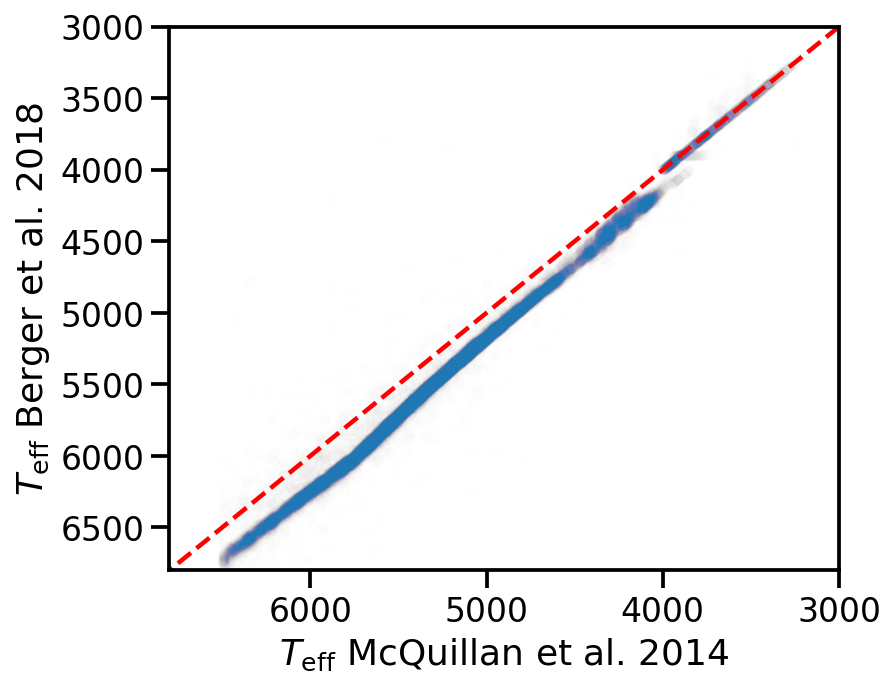

In [20]:
x_vals = np.arange(3000, 6801, 100)
plt.figure(figsize=(6, 5))
plt.plot(df5.Teff_McQuillan14, df5.Teff_Berger18, '.', alpha=0.003)
plt.xlim(6800, 3000)
plt.ylim(6800, 3000)
plt.plot(x_vals, x_vals, 'r--')
plt.xlabel('$T_{\mathrm{eff}}$ McQuillan et al. 2014')
plt.ylabel('$T_{\mathrm{eff}}$ Berger et al. 2018')

Fascinating bias!

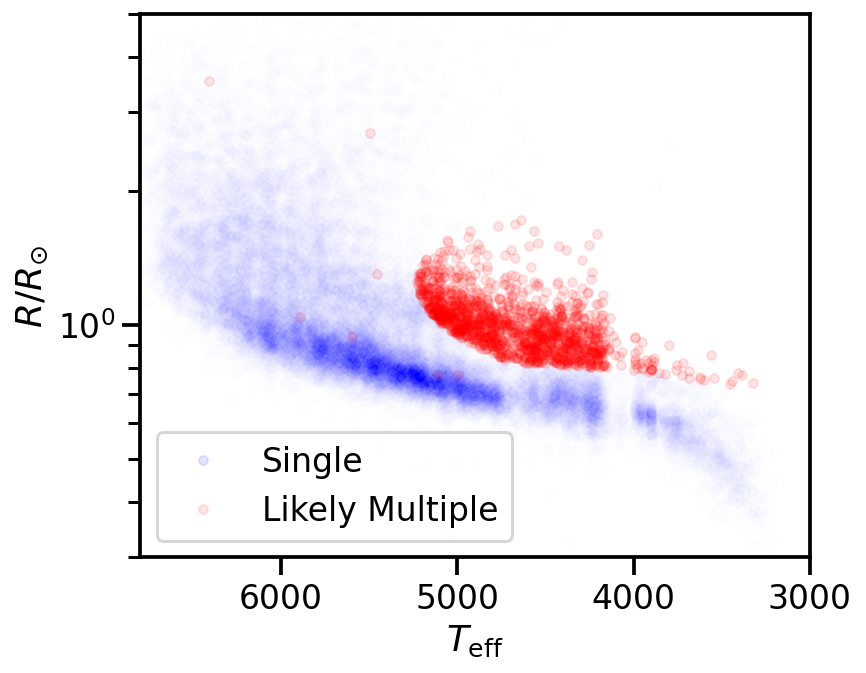

In [21]:
plt.figure(figsize=(6, 5))
singleton = df5.Bin == 0 
multi = df5.Bin > 0 
plt.plot(df5.Teff_Berger18[singleton], df5['R*'][singleton].values, 'b.', alpha=0.003)
plt.plot(1.0,1, 'b.', alpha=0.1, label='Single')
plt.plot(df5.Teff_Berger18[multi], df5['R*'][multi], 'r.', alpha=0.1, label='Likely Multiple')
plt.xlim(6800, 3000)
plt.ylim(3.0e-1, 5.0e0)
plt.yscale('log')
plt.xlabel('$T_{\mathrm{eff}}$')
plt.ylabel('$R/R_{\odot}$')
plt.legend(loc='best');

You can see the binary main sequence.  Nice.

In [22]:
df6 = df5[singleton].reset_index(drop=True)

In [23]:
df6.columns

Index(['KIC', 'Teff_McQuillan14', 'PRot', 'e_PRot', 'Rper', 'Teff_Berger18',
       'e_Teff', 'R*', 'E_R*', 'e_R*', 'AV', 'Evol', 'Bin'],
      dtype='object')

In [24]:
df7 = df6.sort_values()

TypeError: sort_values() missing 1 required positional argument: 'by'

/home/gully/miniconda3/envs/contracosta/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: The 'alpha' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  if __name__ == '__main__':


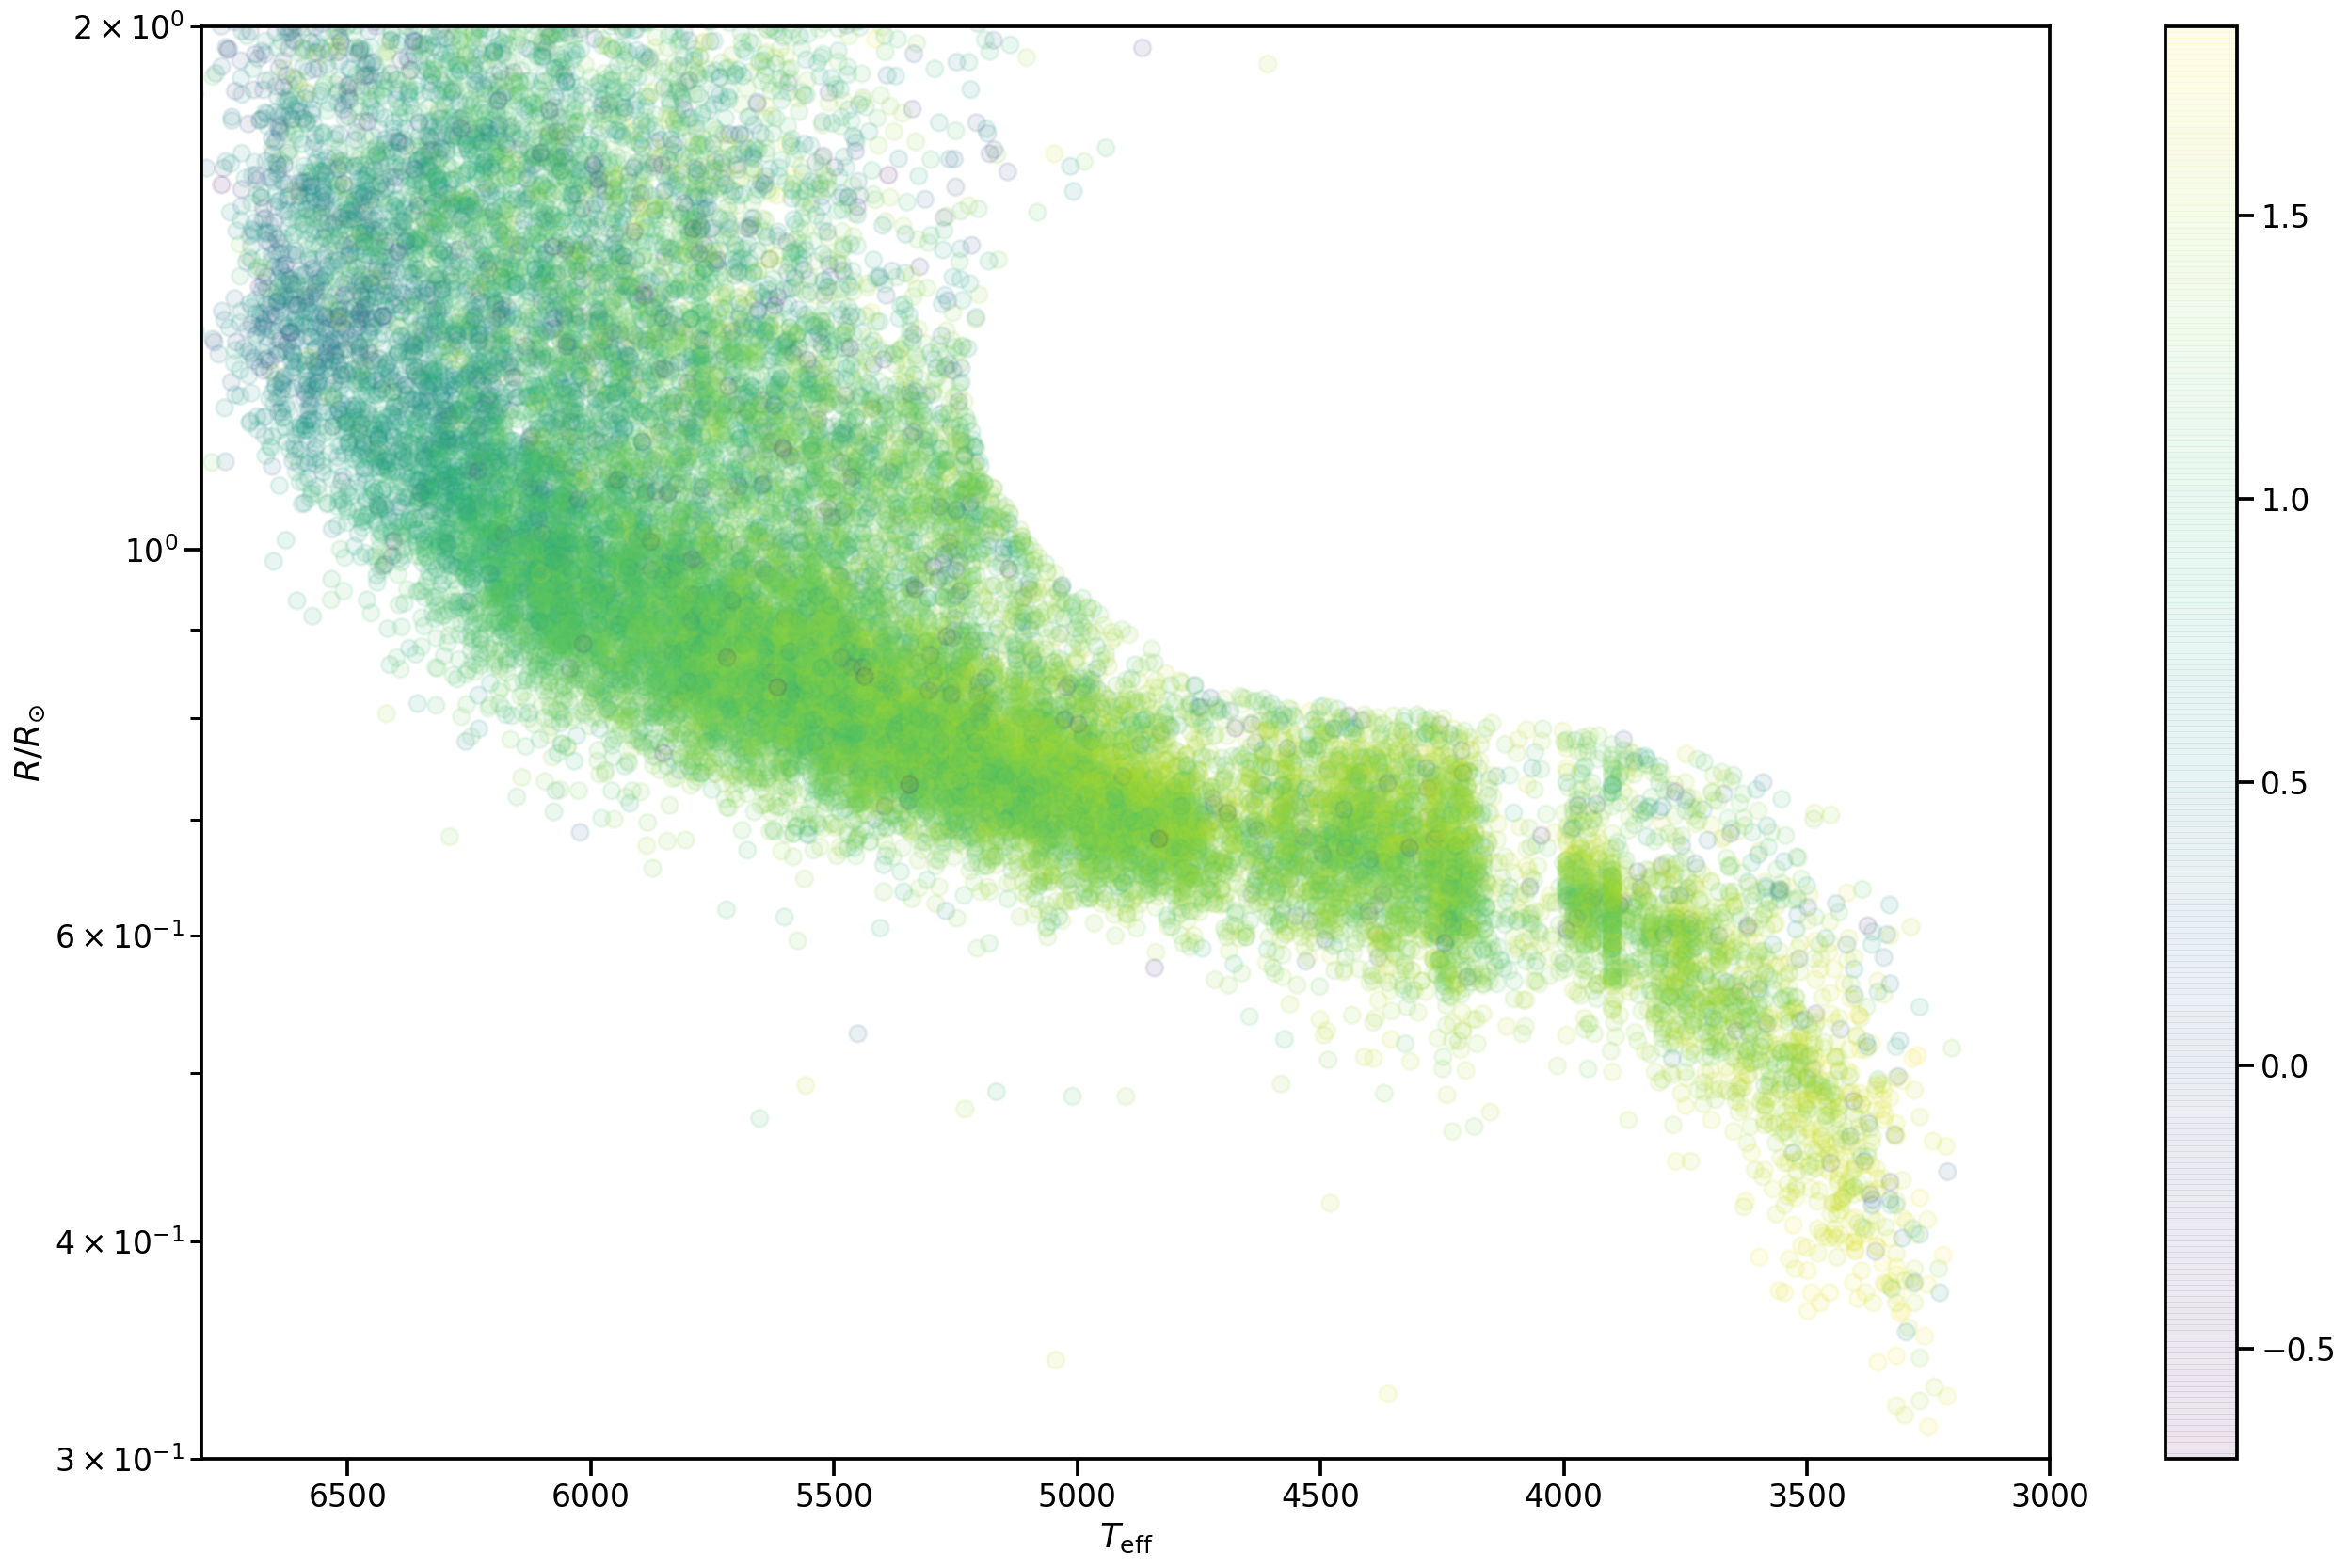

In [25]:
plt.figure(figsize=(22, 14))

sc = plt.scatter(df6.Teff_Berger18, df6['R*'].values, c=np.log10(df6.PRot), alpha=0.1)
plt.xlim(6800, 3000)
plt.ylim(3.0e-1, 2.0e0)
plt.yscale('log')
plt.xlabel('$T_{\mathrm{eff}}$')
plt.ylabel('$R/R_{\odot}$')
plt.colorbar(sc, alpha=1);

If you squint, you can sort of see a trend in the M-dwarfs.

## Replicate Figure 4 of McQuillan

<img width=900 src=https://iopscience.iop.org/0067-0049/211/2/24/downloadHRFigure/figure/apjs492452f4></src>

In [26]:
df6.columns

Index(['KIC', 'Teff_McQuillan14', 'PRot', 'e_PRot', 'Rper', 'Teff_Berger18',
       'e_Teff', 'R*', 'E_R*', 'e_R*', 'AV', 'Evol', 'Bin'],
      dtype='object')

/home/gully/miniconda3/envs/contracosta/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: The 'alpha' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  if __name__ == '__main__':


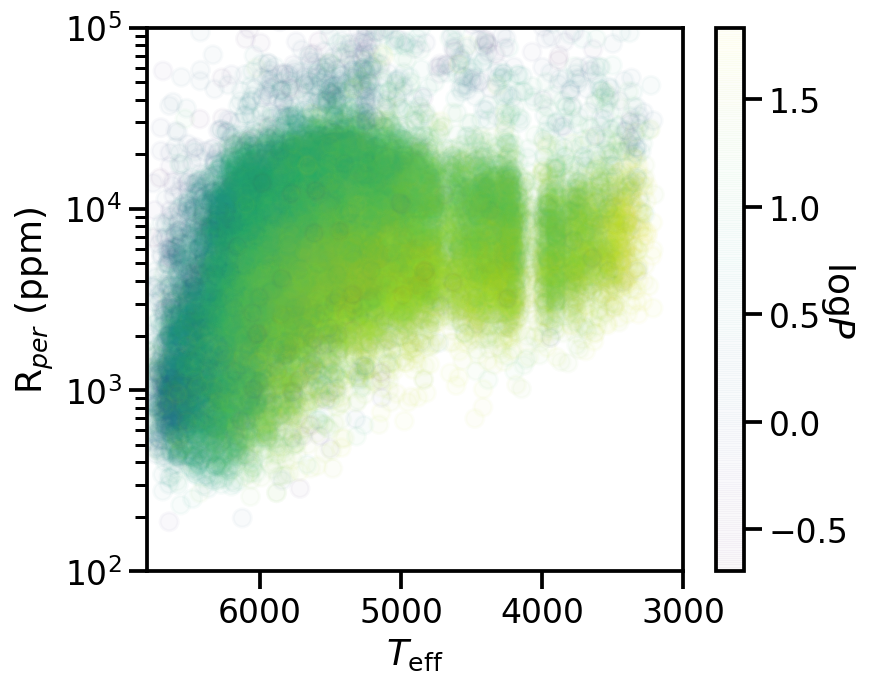

In [27]:
plt.figure(figsize=(6, 5))

sc = plt.scatter(df6.Teff_Berger18, df6['Rper'].values, c=np.log10(df6.PRot), alpha=0.03)
plt.xlim(6800, 3000)
plt.ylim(1e2, 1e5)
plt.yscale('log')
plt.xlabel('$T_{\mathrm{eff}}$')
plt.ylabel('$\mathsf{R}_{per}$ (ppm)')
cbar = plt.colorbar(sc, alpha=1)
cbar.set_label('$\log{P}$', rotation=270)

In [28]:
df6.columns

Index(['KIC', 'Teff_McQuillan14', 'PRot', 'e_PRot', 'Rper', 'Teff_Berger18',
       'e_Teff', 'R*', 'E_R*', 'e_R*', 'AV', 'Evol', 'Bin'],
      dtype='object')

/home/gully/miniconda3/envs/contracosta/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: The 'alpha' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  


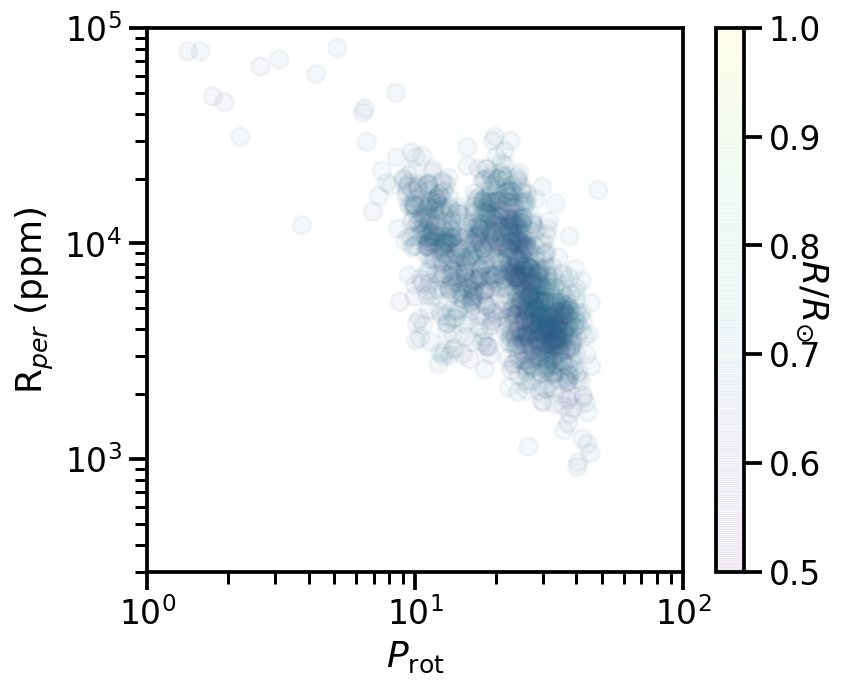

In [29]:
plt.figure(figsize=(6, 5))

teff_cut = (df6.Teff_Berger18 > 4500) & (df6.Teff_Berger18 < 5000) 

radius_cut = df6['R*'] < 0.7
subset = teff_cut & radius_cut
sc = plt.scatter(df6.PRot[subset], df6['Rper'][subset].values, c=df6['R*'][subset], alpha=0.05, vmin=0.5, vmax=1.0)
plt.ylim(3e2, 1e5)
plt.xlim(1e0, 1e2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$P_{\mathrm{rot}}$')
plt.ylabel('$\mathsf{R}_{per}$ (ppm)')
cbar = plt.colorbar(sc, alpha=1)
cbar.set_label('$R/R_{\odot}$', rotation=270)

/home/gully/miniconda3/envs/contracosta/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='R*'>

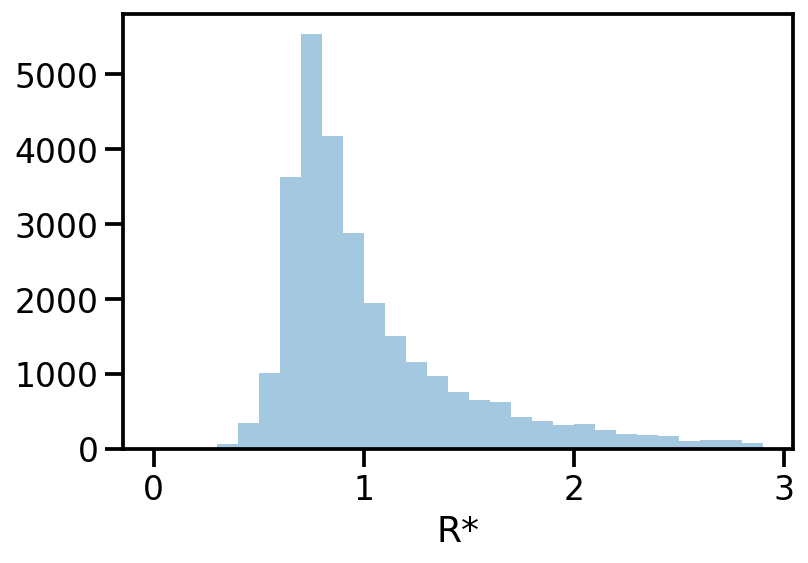

In [30]:
sns.distplot(df6['R*'], bins=np.arange(0, 3, 0.1), kde=False)

In [49]:
fake_subset = (df6['Rper'] > 1e3)  & (df6.PRot < 27)
fake_rapid = (df6['Rper'] > 1e4)  & (df6.PRot < 10)

In [50]:
#teff_cut = (df6.Teff_Berger18 < 4000) 
teff_cut = (df6.Teff_Berger18 > 4000) & (df6.Teff_Berger18 < 4500) 
#teff_cut = (df6.Teff_Berger18 > 4500) & (df6.Teff_Berger18 < 5000) 
#teff_cut = (df6.Teff_Berger18 > 5000) & (df6.Teff_Berger18 < 5500) 

subset = teff_cut

In [51]:
net = fake_subset & subset
fake_dat = df6['Rper'][net].values*0.4
fake_dat_r = df6['Rper'][fake_rapid & subset].values*0.4

In [33]:
! ls ../proposals/TESS_GI_cycle02/figures/

fig1.pdf  multi_panel.pdf


In [40]:
from matplotlib import patches

/home/gully/miniconda3/envs/contracosta/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/gully/miniconda3/envs/contracosta/lib/python3.6/site-packages/seaborn/distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.3`, but please update your code.
  warnings.warn(msg, UserWarning)
/home/gully/miniconda3/envs/contracosta/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/gully/miniconda3/envs/contracosta/lib/python3.6/

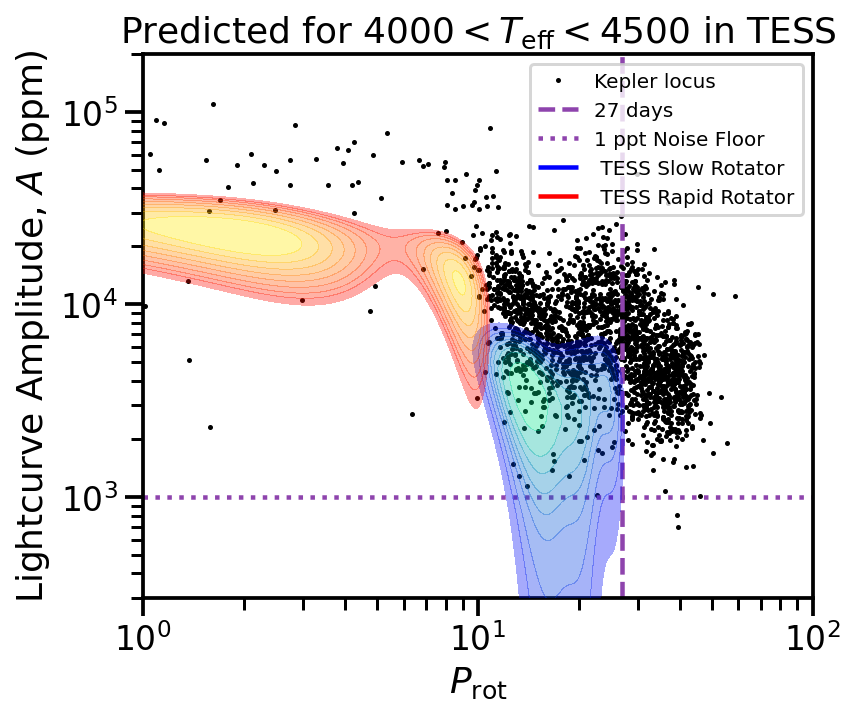

In [57]:
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111)

#teff_cut = (df6.Teff_Berger18 < 4000) 
teff_cut = (df6.Teff_Berger18 > 4000) & (df6.Teff_Berger18 < 4500) 
#teff_cut = (df6.Teff_Berger18 > 4500) & (df6.Teff_Berger18 < 5000) 
#teff_cut = (df6.Teff_Berger18 > 5000) & (df6.Teff_Berger18 < 5500) 

subset = teff_cut
plt.plot(df6.PRot[subset], df6['Rper'][subset].values, 'k.', ms=3, zorder=1, label='Kepler locus')
#sns.kdeplot(df6.PRot[subset], df6['Rper'][subset].values,shade=True, shade_lowest=False, cmap='Greys',alpha=0.35, zorder=2)

sns.kdeplot(df6.PRot[net], fake_dat,shade=True, shade_lowest=False,cmap='winter',
            alpha=0.35, zorder=3, thresh=0.3, label=None)
sns.kdeplot(-1*df6.PRot[net], fake_dat,cmap='winter',
            alpha=1.0, zorder=3, thresh=0.3, label=' TESS Slow Rotator')
sns.kdeplot(df6.PRot[fake_rapid & subset], fake_dat_r,cmap='autumn',shade=True, shade_lowest=False,
            alpha=0.35, thresh=0.5, zorder=3, label=None)
sns.kdeplot(-1*df6.PRot[net], fake_dat,cmap='autumn',
            alpha=1.0, zorder=3, thresh=0.3, label=' TESS Rapid Rotator')


plt.axvline(27, linestyle='dashed', color='#8e44ad', label = '27 days')
plt.axhline(1e3, linestyle='dotted', color='#8e44ad', label = '1 ppt Noise Floor')

#subset = teff_cut & ~radius_cut
#sns.kdeplot(df6.PRot[subset], df6['Rper'][subset].values)
plt.ylim(3e2, 2e5)
plt.xlim(1e0, 1e2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$P_{\mathrm{rot}}$')
plt.ylabel('Lightcurve Amplitude, $A$ (ppm)')
plt.legend(loc='upper right', fontsize=10)
plt.title('Predicted for $4000 < T_\mathrm{eff}<4500$ in TESS')
plt.savefig('../proposals/TESS_GI_cycle04/figures/fig2.pdf', bbox_inches='tight')